# KHÁM PHÁ DỮ LIỆU AIRBNB NYC 2019


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append("../src")
from data_processing import load_data, get_numeric_columns, calculate_statistics, calculate_correlation
from visualization import plot_distribution, plot_box, plot_correlation_matrix

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Load và Kiểm tra Dữ liệu

In [4]:
data_path = '../data/raw/AB_NYC_2019.csv'
data, headers = load_data(data_path)

print(f"Số lượng mẫu: {data.shape[0]}")
print(f"Số lượng features: {data.shape[1]}")
print(f"\nTên các cột:")
for idx, header in enumerate(headers):
    print(f"  {idx}: {header}")

Số lượng mẫu: 48895
Số lượng features: 16

Tên các cột:
  0: id
  1: name
  2: host_id
  3: host_name
  4: neighbourhood_group
  5: neighbourhood
  6: latitude
  7: longitude
  8: room_type
  9: price
  10: minimum_nights
  11: number_of_reviews
  12: last_review
  13: reviews_per_month
  14: calculated_host_listings_count
  15: availability_365


In [5]:
print("5 mẫu đầu tiên:")
print("-" * 100)
for i in range(min(5, len(data))):
    print(f"\nMẫu {i+1}:")
    for j, header in enumerate(headers):
        print(f"  {header}: {data[i, j]}")

5 mẫu đầu tiên:
----------------------------------------------------------------------------------------------------

Mẫu 1:
  id: 2539
  name: Clean & quiet apt home by the park
  host_id: 2787
  host_name: John
  neighbourhood_group: Brooklyn
  neighbourhood: Kensington
  latitude: 40.64749
  longitude: -73.97237
  room_type: Private room
  price: 149
  minimum_nights: 1
  number_of_reviews: 9
  last_review: 2018-10-19
  reviews_per_month: 0.21
  calculated_host_listings_count: 6
  availability_365: 365

Mẫu 2:
  id: 2595
  name: Skylit Midtown Castle
  host_id: 2845
  host_name: Jennifer
  neighbourhood_group: Manhattan
  neighbourhood: Midtown
  latitude: 40.75362
  longitude: -73.98377
  room_type: Entire home/apt
  price: 225
  minimum_nights: 1
  number_of_reviews: 45
  last_review: 2019-05-21
  reviews_per_month: 0.38
  calculated_host_listings_count: 2
  availability_365: 355

Mẫu 3:
  id: 3647
  name: THE VILLAGE OF HARLEM....NEW YORK !
  host_id: 4632
  host_name: Elisabeth


## 2. Thống kê Mô tả

In [6]:
stats = calculate_statistics(data, headers)

print("THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:")
print("=" * 100)
for col_name, col_stats in stats.items():
    print(f"\n{col_name}:")
    print(f"  Count:   {col_stats['count']:.0f}")
    print(f"  Mean:    {col_stats['mean']:.2f}")
    print(f"  Std:     {col_stats['std']:.2f}")
    print(f"  Min:     {col_stats['min']:.2f}")
    print(f"  Q1:      {col_stats['q1']:.2f}")
    print(f"  Median:  {col_stats['median']:.2f}")
    print(f"  Q3:      {col_stats['q3']:.2f}")
    print(f"  Max:     {col_stats['max']:.2f}")

THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:

id:
  Count:   48895
  Mean:    19017143.24
  Std:     10982996.07
  Min:     2539.00
  Q1:      9471945.00
  Median:  19677284.00
  Q3:      29152178.50
  Max:     36487245.00

host_id:
  Count:   48895
  Mean:    67620010.65
  Std:     78610163.15
  Min:     2438.00
  Q1:      7822033.00
  Median:  30793816.00
  Q3:      107434423.00
  Max:     274321313.00

latitude:
  Count:   48895
  Mean:    40.73
  Std:     0.05
  Min:     40.50
  Q1:      40.69
  Median:  40.72
  Q3:      40.76
  Max:     40.91

longitude:
  Count:   48895
  Mean:    -73.95
  Std:     0.05
  Min:     -74.24
  Q1:      -73.98
  Median:  -73.96
  Q3:      -73.94
  Max:     -73.71

price:
  Count:   48895
  Mean:    152.72
  Std:     240.15
  Min:     0.00
  Q1:      69.00
  Median:  106.00
  Q3:      175.00
  Max:     10000.00

minimum_nights:
  Count:   48895
  Mean:    7.03
  Std:     20.51
  Min:     1.00
  Q1:      1.00
  Median:  3.00
  Q3:      5.00
  Max:     1250.00

number

## 3. Phân tích Missing Values

In [7]:
print("PHÂN TÍCH MISSING VALUES:")
print("=" * 100)

for idx, header in enumerate(headers):
    col = data[:, idx]
    missing_count = np.sum((col == '') | (col == None))
    missing_percent = (missing_count / len(col)) * 100
    
    print(f"{header:35} - Missing: {missing_count:6} ({missing_percent:5.2f}%)")

PHÂN TÍCH MISSING VALUES:
id                                  - Missing:      0 ( 0.00%)
name                                - Missing:     16 ( 0.03%)
host_id                             - Missing:      0 ( 0.00%)
host_name                           - Missing:     21 ( 0.04%)
neighbourhood_group                 - Missing:      0 ( 0.00%)
neighbourhood                       - Missing:      0 ( 0.00%)
latitude                            - Missing:      0 ( 0.00%)
longitude                           - Missing:      0 ( 0.00%)
room_type                           - Missing:      0 ( 0.00%)
price                               - Missing:      0 ( 0.00%)
minimum_nights                      - Missing:      0 ( 0.00%)
number_of_reviews                   - Missing:      0 ( 0.00%)
last_review                         - Missing:  10052 (20.56%)
reviews_per_month                   - Missing:  10052 (20.56%)
calculated_host_listings_count      - Missing:      0 ( 0.00%)
availability_365             

## 4. Phân phối Dữ liệu

In [8]:
numeric_indices, numeric_headers = get_numeric_columns(data, headers)

print(f"Số lượng cột số: {len(numeric_headers)}")
print(f"Các cột số: {', '.join(numeric_headers)}")

Số lượng cột số: 10
Các cột số: id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365


## CÂU HỎI PHÂN TÍCH 1: Tìm hiểu về chủ sở hữu và khách hàng

**Câu hỏi:** Chúng ta có thể tìm hiểu gì về các chủ sở hữu (hosts) và khách hàng khác nhau?

**Phân tích:**
- **Về chủ sở hữu:** Qua dữ liệu `calculated_host_listings_count`, chúng ta có thể xác định được host nào đang quản lý nhiều listing nhất, từ đó biết được host nào hoạt động kinh doanh chuyên nghiệp
- **Về khách hàng:** Qua `number_of_reviews` và `reviews_per_month`, chúng ta có thể đánh giá mức độ phổ biến của các listing và hành vi thuê nhà của khách hàng
- **Hành vi thuê:** `minimum_nights` cho thấy yêu cầu tối thiểu của host, phản ánh loại hình khách hàng họ nhắm đến (du lịch ngắn hạn vs thuê dài hạn)

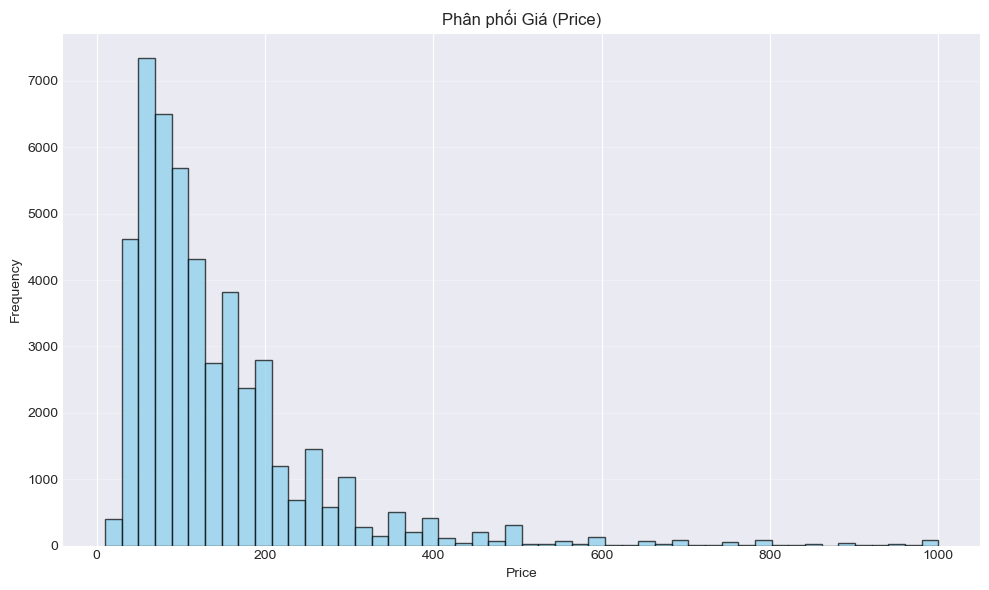

In [9]:
price_idx = headers.index('price')
price_data = data[:, price_idx]
price_numeric = price_data[price_data != ''].astype(float)
price_filtered = price_numeric[(price_numeric > 0) & (price_numeric <= 1000)]

plot_distribution(price_filtered, 'Price', 'Phân phối Giá (Price)', bins=50)

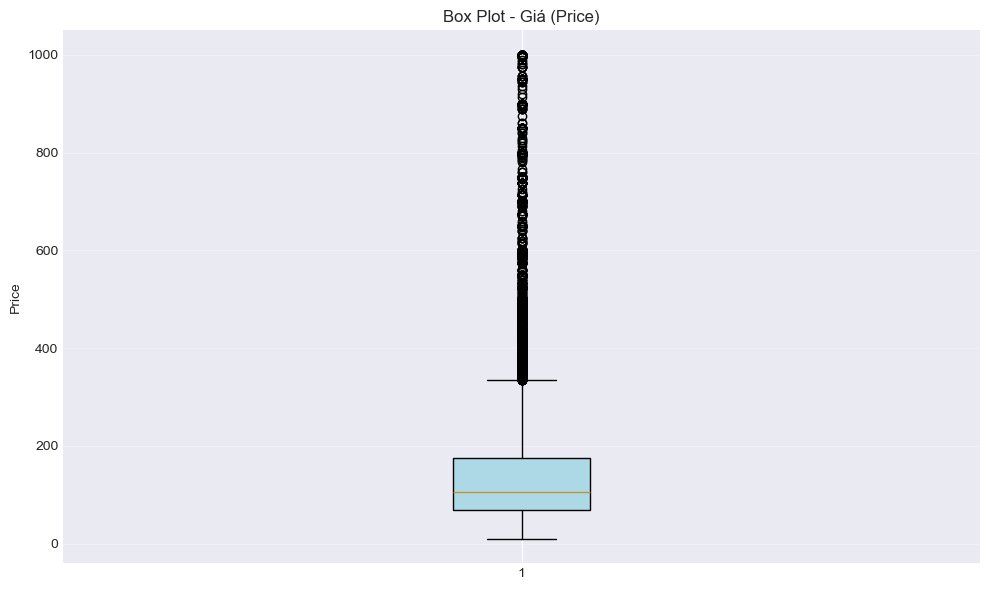

In [10]:
plot_box(price_filtered, 'Price', 'Box Plot - Giá (Price)')

### Nhận định về Giá (Price):

**Quan sát:**
- Giá có phân phối lệch phải (right-skewed), phần lớn listing có giá từ $50-$200/đêm
- Có nhiều outliers với giá rất cao (>$500), có thể là các căn hộ cao cấp hoặc nhà nguyên căn lớn
- Box plot cho thấy median price thấp hơn mean, xác nhận phân phối lệch

**Khuyến nghị:**
- Khách hàng có ngân sách hạn chế nên tìm kiếm trong khoảng $50-$150
- Host đặt giá nên tham khảo median/Q3 của khu vực để cạnh tranh
- Cần xem xét loại bỏ outliers khi xây dựng mô hình dự đoán giá

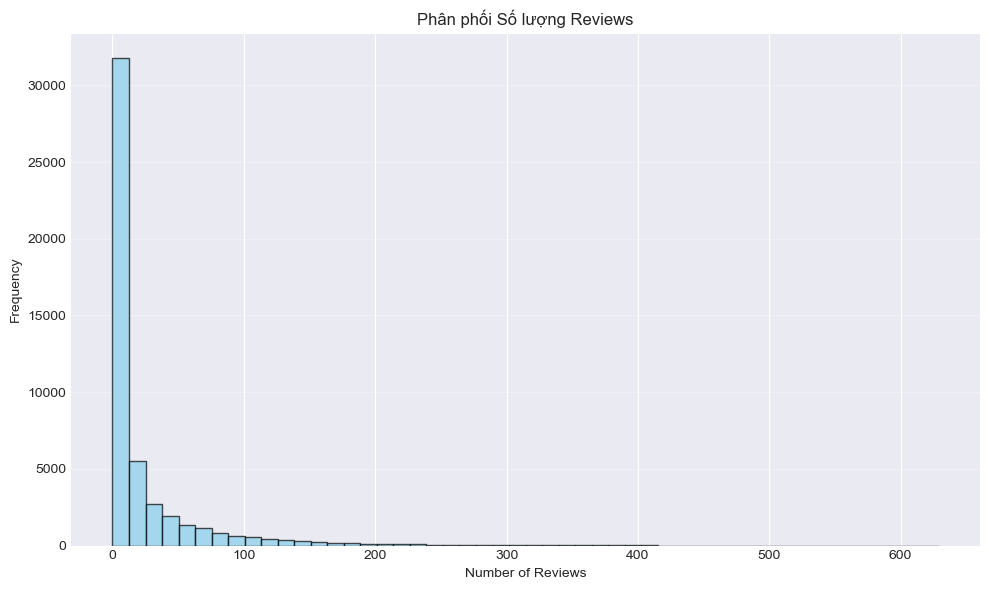

In [11]:
reviews_idx = headers.index('number_of_reviews')
reviews_data = data[:, reviews_idx]
reviews_numeric = reviews_data[reviews_data != ''].astype(float)

plot_distribution(reviews_numeric, 'Number of Reviews', 'Phân phối Số lượng Reviews', bins=50)

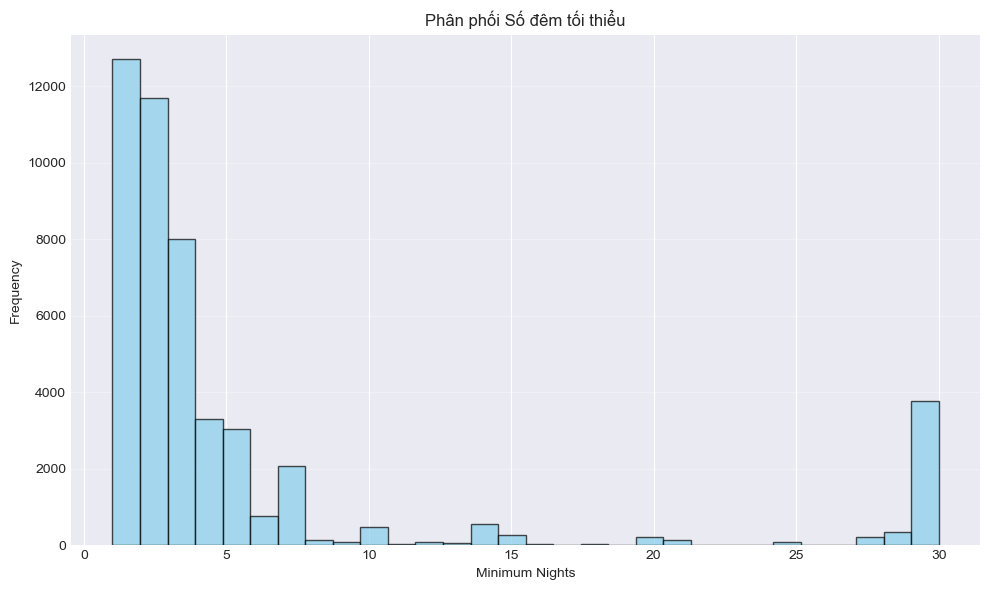

In [12]:
min_nights_idx = headers.index('minimum_nights')
min_nights_data = data[:, min_nights_idx]
min_nights_numeric = min_nights_data[min_nights_data != ''].astype(float)
min_nights_filtered = min_nights_numeric[min_nights_numeric <= 30]

plot_distribution(min_nights_filtered, 'Minimum Nights', 'Phân phối Số đêm tối thiểu', bins=30)

### Nhận định về Reviews và Minimum Nights:

**Về Reviews:**
- Phân phối số reviews rất lệch, nhiều listing có 0-10 reviews
- Một số listing có hơn 100 reviews, cho thấy chúng rất phổ biến và đáng tin cậy
- Reviews cao thường liên quan đến giá hợp lý và chất lượng dịch vụ tốt

**Về Minimum Nights:**
- Phần lớn listing yêu cầu 1-7 đêm tối thiểu, phù hợp cho du khách ngắn hạn
- Một số listing yêu cầu >30 đêm, có thể nhắm đến người thuê dài hạn
- Điều này phản ánh chiến lược kinh doanh khác nhau của các host

## 5. Ma trận Correlation

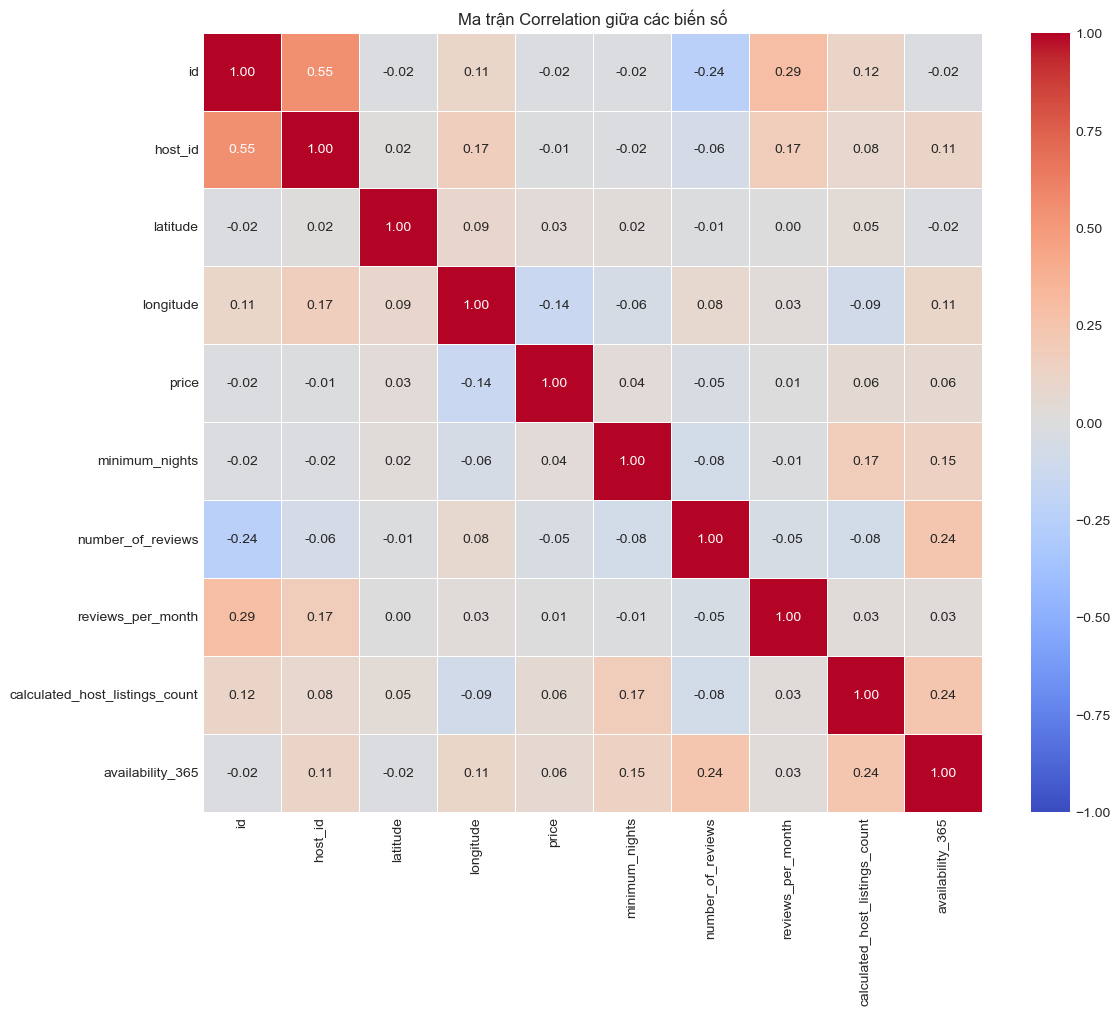

In [13]:
corr_matrix, corr_labels = calculate_correlation(data, headers)

if len(corr_matrix) > 0:
    plot_correlation_matrix(corr_matrix, corr_labels, 'Ma trận Correlation giữa các biến số')
else:
    print("Không có đủ dữ liệu số để tính correlation")

## 6. Phân tích theo Room Type

Phân phối Room Type:
  Entire home/apt      -  25409 (51.97%)
  Private room         -  22326 (45.66%)
  Shared room          -   1160 ( 2.37%)


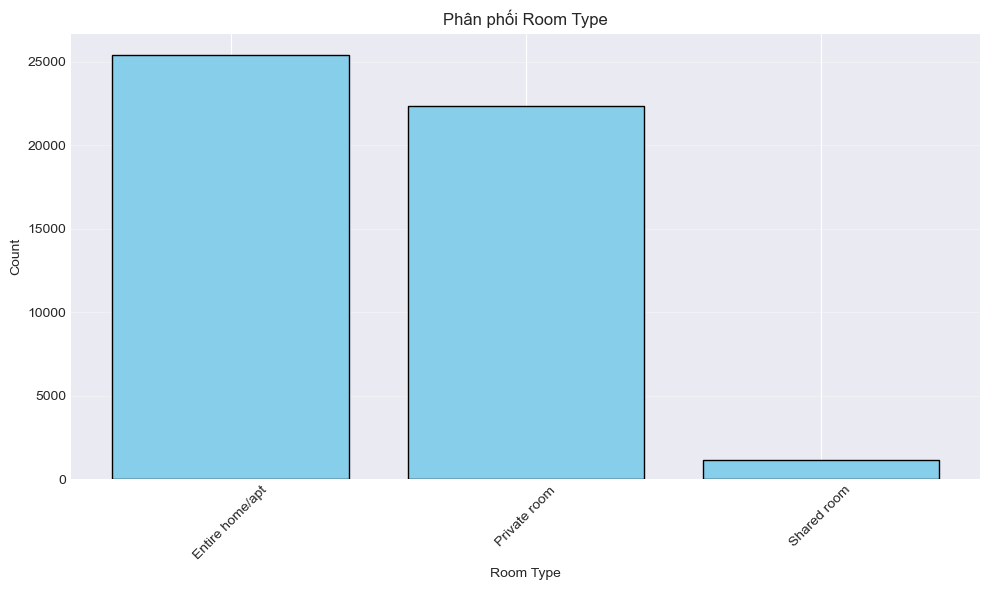

In [14]:
room_type_idx = headers.index('room_type')
room_types = data[:, room_type_idx]
unique_room_types, counts = np.unique(room_types, return_counts=True)

print("Phân phối Room Type:")
for rt, count in zip(unique_room_types, counts):
    percent = (count / len(room_types)) * 100
    print(f"  {rt:20} - {count:6} ({percent:5.2f}%)")

plt.figure(figsize=(10, 6))
plt.bar(unique_room_types, counts, color='skyblue', edgecolor='black')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Phân phối Room Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Phân tích Room Type:

**Kết quả quan sát:**
- Entire home/apt và Private room chiếm đa số thị trường
- Shared room rất ít, cho thấy nhu cầu về không gian riêng tư cao

**Ý nghĩa:**
- Thị trường Airbnb NYC nghiêng về chất lượng và riêng tư
- Cơ hội kinh doanh tốt cho host có thể cho thuê toàn bộ căn hộ
- Shared room chỉ phù hợp với phân khúc khách du lịch ngân sách thấp

**Khuyến nghị cho host mới:**
- Nếu có điều kiện, nên cho thuê entire home/apt để tối đa hóa lợi nhuận
- Private room là lựa chọn tốt nếu vẫn sống trong nhà
- Cần cạnh tranh về giá và chất lượng trong phân khúc đã chọn

## CÂU HỎI PHÂN TÍCH 2: Phân tích theo loại phòng

**Câu hỏi:** Loại phòng nào phổ biến nhất? Điều này cho thấy gì về thị trường?

**Dự đoán:** 
- Entire home/apt có thể sẽ có giá cao nhất nhưng ít listing hơn
- Private room sẽ là lựa chọn cân bằng giữa giá và riêng tư
- Shared room sẽ rẻ nhất nhưng ít được ưa chuộng

## 7. Phân tích theo Neighbourhood Group

Phân phối Neighbourhood Group:
  Bronx                -   1091 ( 2.23%)
  Brooklyn             -  20104 (41.12%)
  Manhattan            -  21661 (44.30%)
  Queens               -   5666 (11.59%)
  Staten Island        -    373 ( 0.76%)


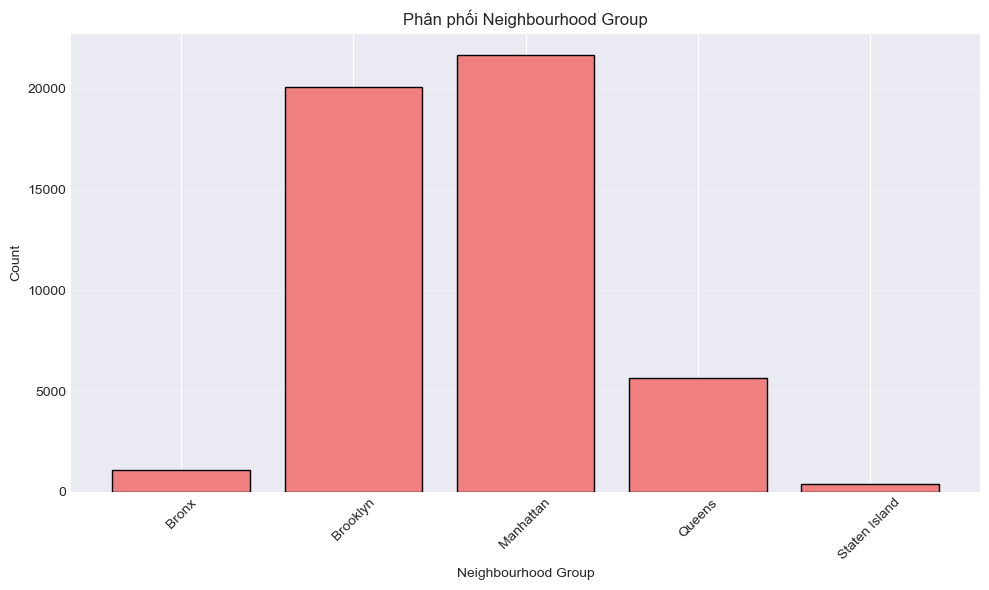

In [15]:
neighbourhood_idx = headers.index('neighbourhood_group')
neighbourhoods = data[:, neighbourhood_idx]
unique_neighbourhoods, counts = np.unique(neighbourhoods, return_counts=True)

print("Phân phối Neighbourhood Group:")
for nb, count in zip(unique_neighbourhoods, counts):
    percent = (count / len(neighbourhoods)) * 100
    print(f"  {nb:20} - {count:6} ({percent:5.2f}%)")

plt.figure(figsize=(10, 6))
plt.bar(unique_neighbourhoods, counts, color='lightcoral', edgecolor='black')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Phân phối Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Phân tích Neighbourhood Group:

**Phân phối lưu lượng:**
- Manhattan và Brooklyn chiếm tỷ trọng lớn nhất
- Queens, Bronx và Staten Island có ít listing hơn nhiều

**Nguyên nhân và phân tích:**

**Manhattan (lưu lượng cao):**
- Trung tâm du lịch, gần các điểm tham quan chính
- Giá cao nhưng nhu cầu vẫn lớn do vị trí đắc địa
- Host ở đây có thể bận rộn nhất do booking rate cao

**Brooklyn (lưu lượng cao):**
- Khu vực đang phát triển, có nhiều quán ăn và văn hóa
- Giá cả phải chăng hơn Manhattan
- Lựa chọn tốt cho khách muốn trải nghiệm local

**Queens, Bronx, Staten Island (lưu lượng thấp):**
- Xa trung tâm, ít điểm du lịch
- Phù hợp khách có ngân sách thấp hoặc ở lâu dài
- Cơ hội cho host đặt giá cạnh tranh để thu hút khách

**Xác định Host bận rộn:**
Host bận rộn nhất thường có:
- Nhiều listings (>5 properties)
- Reviews/month cao (>2)
- Availability thấp (<100 days)
- Vị trí ở Manhattan/Brooklyn
- Room type là Entire home/apt

**Khuyến nghị:**
- Đầu tư vào Manhattan/Brooklyn nếu muốn lưu lượng cao
- Queens/Bronx phù hợp cho chiến lược giá thấp, khối lượng lớn
- Host muốn bận rộn nên có nhiều listing ở vị trí tốt với giá cạnh tranh

## CÂU HỎI PHÂN TÍCH 3: Host nào bận rộn nhất và lưu lượng theo khu vực

**Câu hỏi:** 
1. Những host nào "bận rộn" nhất và tại sao?
2. Có sự khác biệt đáng chú ý về lưu lượng truy cập giữa các khu vực không?

In [17]:
# Phân tích Host bận rộn nhất
print("\n" + "="*100)
print("PHÂN TÍCH HOST BẬN RỘN NHẤT:")
print("="*100)

# Lấy thông tin về host listings
host_listings_idx = headers.index('calculated_host_listings_count')
host_listings = data[:, host_listings_idx]
host_listings_numeric = host_listings[host_listings != ''].astype(float)

# Lấy info về reviews per month
reviews_per_month_idx = headers.index('reviews_per_month')
reviews_per_month = data[:, reviews_per_month_idx]
# Replace empty với 0
reviews_per_month_filled = np.where(reviews_per_month == '', '0', reviews_per_month).astype(float)

# Lấy availability
availability_idx = headers.index('availability_365')
availability = data[:, availability_idx]
availability_numeric = availability[availability != ''].astype(float)

print(f"\nThống kê Host Listings Count:")
print(f"  Mean: {np.mean(host_listings_numeric):.2f}")
print(f"  Median: {np.median(host_listings_numeric):.2f}")
print(f"  Max: {np.max(host_listings_numeric):.0f}")
print(f"  Host có >10 listings: {np.sum(host_listings_numeric > 10)}")
print(f"  Host có >20 listings: {np.sum(host_listings_numeric > 20)}")

print(f"\nThống kê Reviews per Month:")
print(f"  Mean: {np.mean(reviews_per_month_filled):.2f}")
print(f"  Median: {np.median(reviews_per_month_filled):.2f}")
print(f"  Listings có >2 reviews/month: {np.sum(reviews_per_month_filled > 2)}")

print(f"\nThống kê Availability:")
print(f"  Mean: {np.mean(availability_numeric):.2f} ngày")
print(f"  Listings có availability < 100 ngày: {np.sum(availability_numeric < 100)}")
print(f"  Listings có availability < 50 ngày: {np.sum(availability_numeric < 50)}")

print("\nNhận định:")
print("- Host bận rộn thường có nhiều listings và reviews/month cao")
print("- Availability thấp (<100 ngày) cho thấy booking rate cao")
print("- Kết hợp các yếu tố này để xác định host thành công nhất")


PHÂN TÍCH HOST BẬN RỘN NHẤT:

Thống kê Host Listings Count:
  Mean: 7.14
  Median: 1.00
  Max: 327
  Host có >10 listings: 2967
  Host có >20 listings: 2205

Thống kê Reviews per Month:
  Mean: 1.09
  Median: 0.37
  Listings có >2 reviews/month: 9765

Thống kê Availability:
  Mean: 112.78 ngày
  Listings có availability < 100 ngày: 29733
  Listings có availability < 50 ngày: 24838

Nhận định:
- Host bận rộn thường có nhiều listings và reviews/month cao
- Availability thấp (<100 ngày) cho thấy booking rate cao
- Kết hợp các yếu tố này để xác định host thành công nhất
